In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import copy

In [3]:
dataset_orig = pd.read_csv(r'C:\Users\ekksingh\ES\abc\dataset\melb_data.csv\melb_data.csv')

In [4]:
dataset = dataset_orig.copy()

In [5]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [7]:
def percentile_grapher(dataset):
    df = dataset.quantile(np.array(list(range(0,1001,5)))*0.001)
    ncol = len(df.columns)
    fig,axs = plt.subplots(ncol,figsize=(14,5*ncol))
    for i,col in enumerate(df.columns):
        print(i,col)
        axs[i].scatter(x=df[col].index,y=df[col])
        axs[i].set_title(col)

In [10]:
sns.pairplot(dataset)

0 Rooms
1 Price
2 Distance
3 Postcode
4 Bedroom2
5 Bathroom
6 Car
7 Landsize
8 BuildingArea
9 YearBuilt
10 Lattitude
11 Longtitude
12 Propertycount


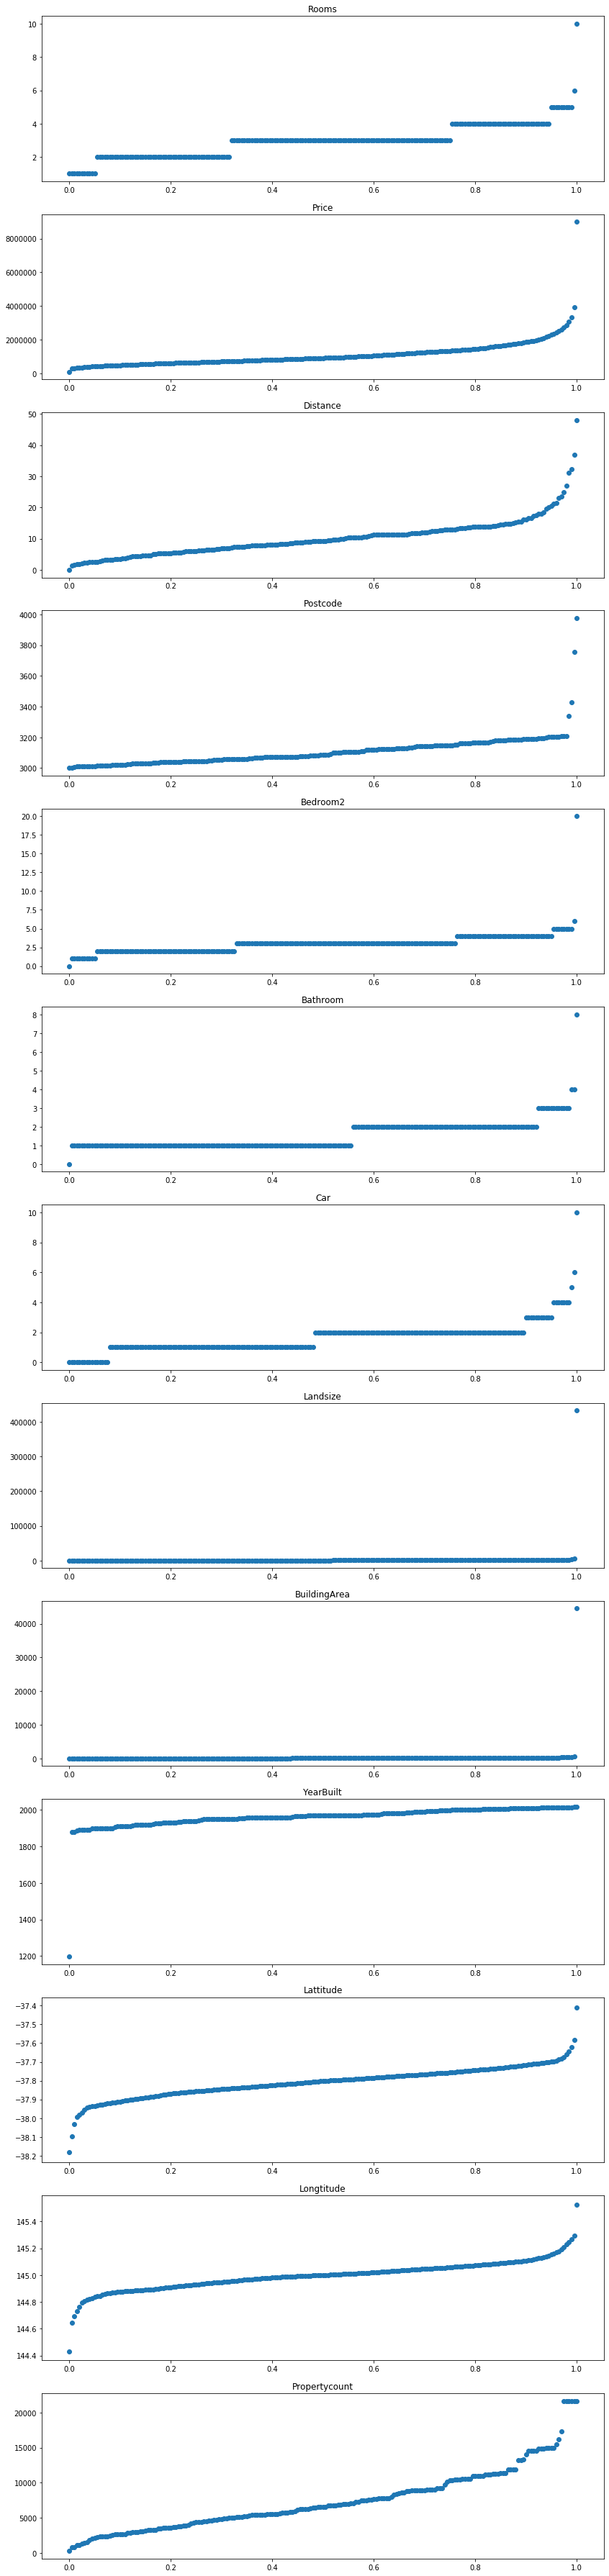

In [10]:
percentile_grapher(dataset)

## Excluding data at extreme percentiles(<=1,>=99) for each column

In [63]:
len1 = len(dataset)
for ele in dataset.quantile([0.01,0.99]).transpose().reset_index().values:
    dataset = dataset.loc[(dataset[ele[0]]>=ele[1]) & (dataset[ele[0]]<=ele[2])]

print('Deleted:'+str(len1-len(dataset)))

Deleted:7635


### Outliers candidates - Percentile Based
Rooms

Price **

Distance

Bedroom2

Bathroom

Car

Landsize **

BuildingArea **

YearBuilt


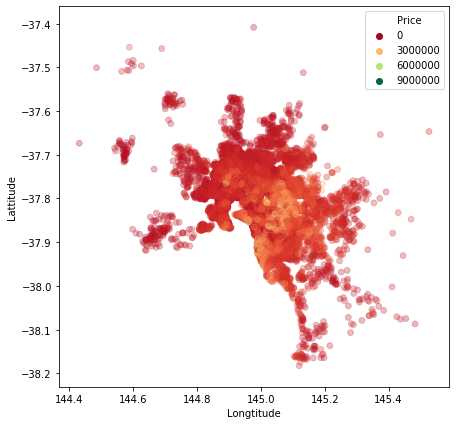

In [9]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Longtitude',y='Lattitude',data=dataset,hue='Price',alpha=0.3,palette='RdYlGn' ,edgecolor=None)

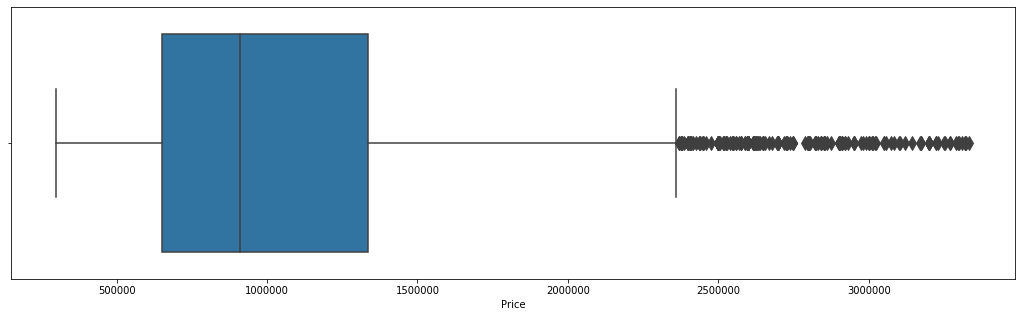

In [19]:
plt.figure(figsize=(18,5))
sns.boxplot(dataset['Price'],fliersize=10,whis=1.5)

### Finding Outliers - Range, Std based

In [20]:
((dataset.describe().loc['max']-dataset.describe().loc['min'])/dataset.describe().loc['mean']*100).sort_values(ascending=False)

Landsize         711.456068
BuildingArea     323.956813
Car              320.727233
Distance         286.398954
Price            286.258880
Propertycount    284.073779
Bathroom         193.858696
Bedroom2         137.456647
Rooms            136.189222
Postcode          10.463548
YearBuilt          6.879099
Longtitude         0.394943
Lattitude         -1.068057
dtype: float64

In [21]:
((dataset.describe().loc['std'])/dataset.describe().loc['mean']*100).sort_values(ascending=False)

Landsize         82.024779
Propertycount    57.349295
Car              55.211513
Price            52.440300
Distance         47.399193
BuildingArea     46.412523
Bathroom         42.381391
Bedroom2         30.966952
Rooms            30.857676
Postcode          1.923290
YearBuilt         1.849172
Longtitude        0.062528
Lattitude        -0.185346
dtype: float64

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(dataset.loc[dataset['Landsize']<1347]['Landsize'])
print(len(dataset.loc[dataset['Landsize']>1347]))

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(dataset.loc[dataset['BuildingArea']<263]['BuildingArea'])
print(len(dataset.loc[dataset['BuildingArea']>263]))

## Missing data plot

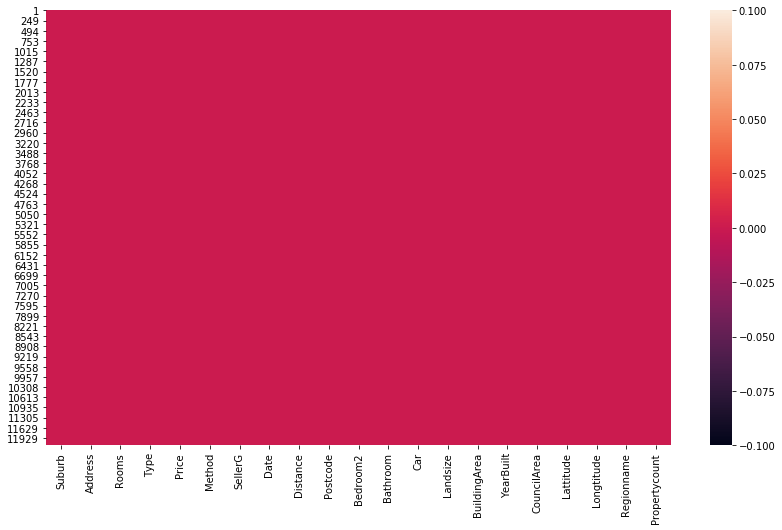

In [66]:
plt.figure(figsize=(14,8))
sns.heatmap(pd.isnull(dataset))

## Dataset Cleaning

In [ ]:
dataset.drop(dataset[dataset['Price']>3000000].index,inplace=True)

In [65]:
dataset.dropna(subset=['Car'],inplace=True)
dataset.dropna(subset=['CouncilArea'],inplace=True)

In [ ]:
dataset.drop(dataset[dataset['YearBuilt']<1800].index,inplace=True)

In [ ]:
dataset.drop(dataset[dataset['BuildingArea']>263].index,inplace=True)

In [ ]:
dataset.drop(dataset[dataset['Landsize']>1340].index,inplace=True)

### Correlation Absolute Values Heatmap

In [7]:
def abs_corr_plot(dataset,target_col):
    abs_cor = np.abs(dataset.corr())
    corr_sorted = abs_cor.sort_values(target_col,ascending=False).index.tolist()
    sns.heatmap(abs_cor[corr_sorted].sort_values(target_col,ascending=False),annot=True,cbar=False)

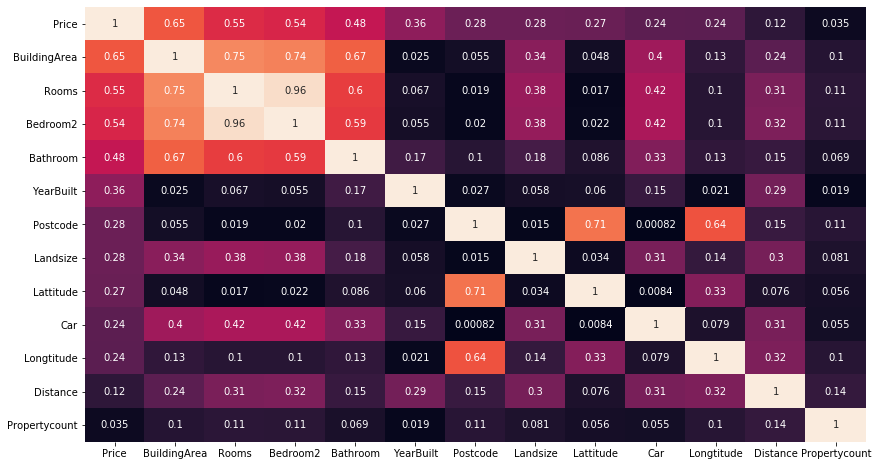

In [8]:
plt.figure(figsize=(14,8))
abs_corr_plot(dataset,'Price')

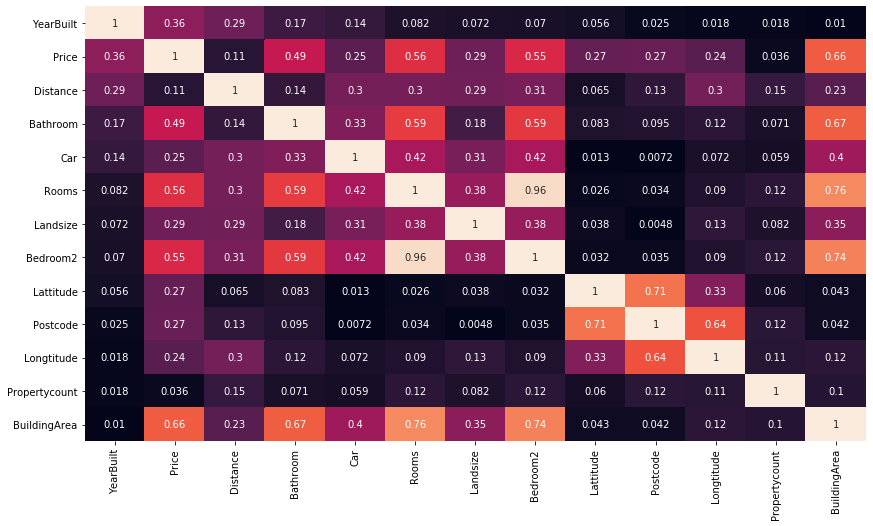

In [27]:
plt.figure(figsize=(14,8))
abs_corr_plot(dataset,'YearBuilt')

### Column Unique Count Finder

In [28]:
def unique_count(dataset,col_list):
    count_list = []
    for col in col_list:
#         print('{0:15}:{1}'.format(col,dataset[col].nunique()))
        count_list.append([col,dataset[col].nunique()])
    frame = pd.DataFrame(np.array(count_list),columns=['Col','Unique_counts'])
    frame['Unique_counts'] = frame['Unique_counts'].apply(pd.to_numeric)
    return frame.sort_values('Unique_counts',ascending=False)

In [ ]:
unique_count(dataset,list(dataset.columns))

In [29]:
non_numeric_col = list(set(dataset.columns)-set(dataset.corr().columns))

unique_count(dataset,non_numeric_col)

,Col,Unique_counts
0,Address,5400
2,Suburb,222
7,SellerG,179
6,Date,51
5,CouncilArea,27
1,Regionname,6
3,Method,5
4,Type,3


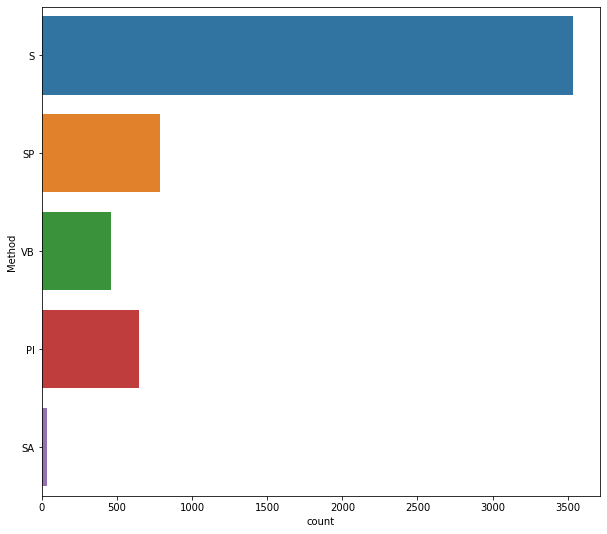

In [30]:
plt.figure(figsize=(10,9))
sns.countplot(y=dataset['Method'],)

### Dummy Variable Generator

In [18]:
def generate_dummies(dataset,col_name):
    temp_dummies = pd.get_dummies(dataset[col_name],drop_first=True)
    new_col = [col_name+'_'+ ele for ele in list(temp_dummies.columns)]
    temp_dummies.columns = new_col
    return temp_dummies

In [ ]:
dummy_df = generate_dummies(dataset,'Type')

### Dummy Joiner

In [19]:
def dummy_joiner(dataset,non_num_col_list):
    final_dummy = pd.DataFrame()
    for non_num_col in non_num_col_list:
        dummy_df = generate_dummies(dataset,non_num_col)
        if len(final_dummy) == 0:
            final_dummy = dummy_df
        else:
            final_dummy = final_dummy.join(dummy_df)
    return final_dummy

In [12]:
full_dummy = dummy_joiner(dataset,['Regionname','Method','Type','CouncilArea'])

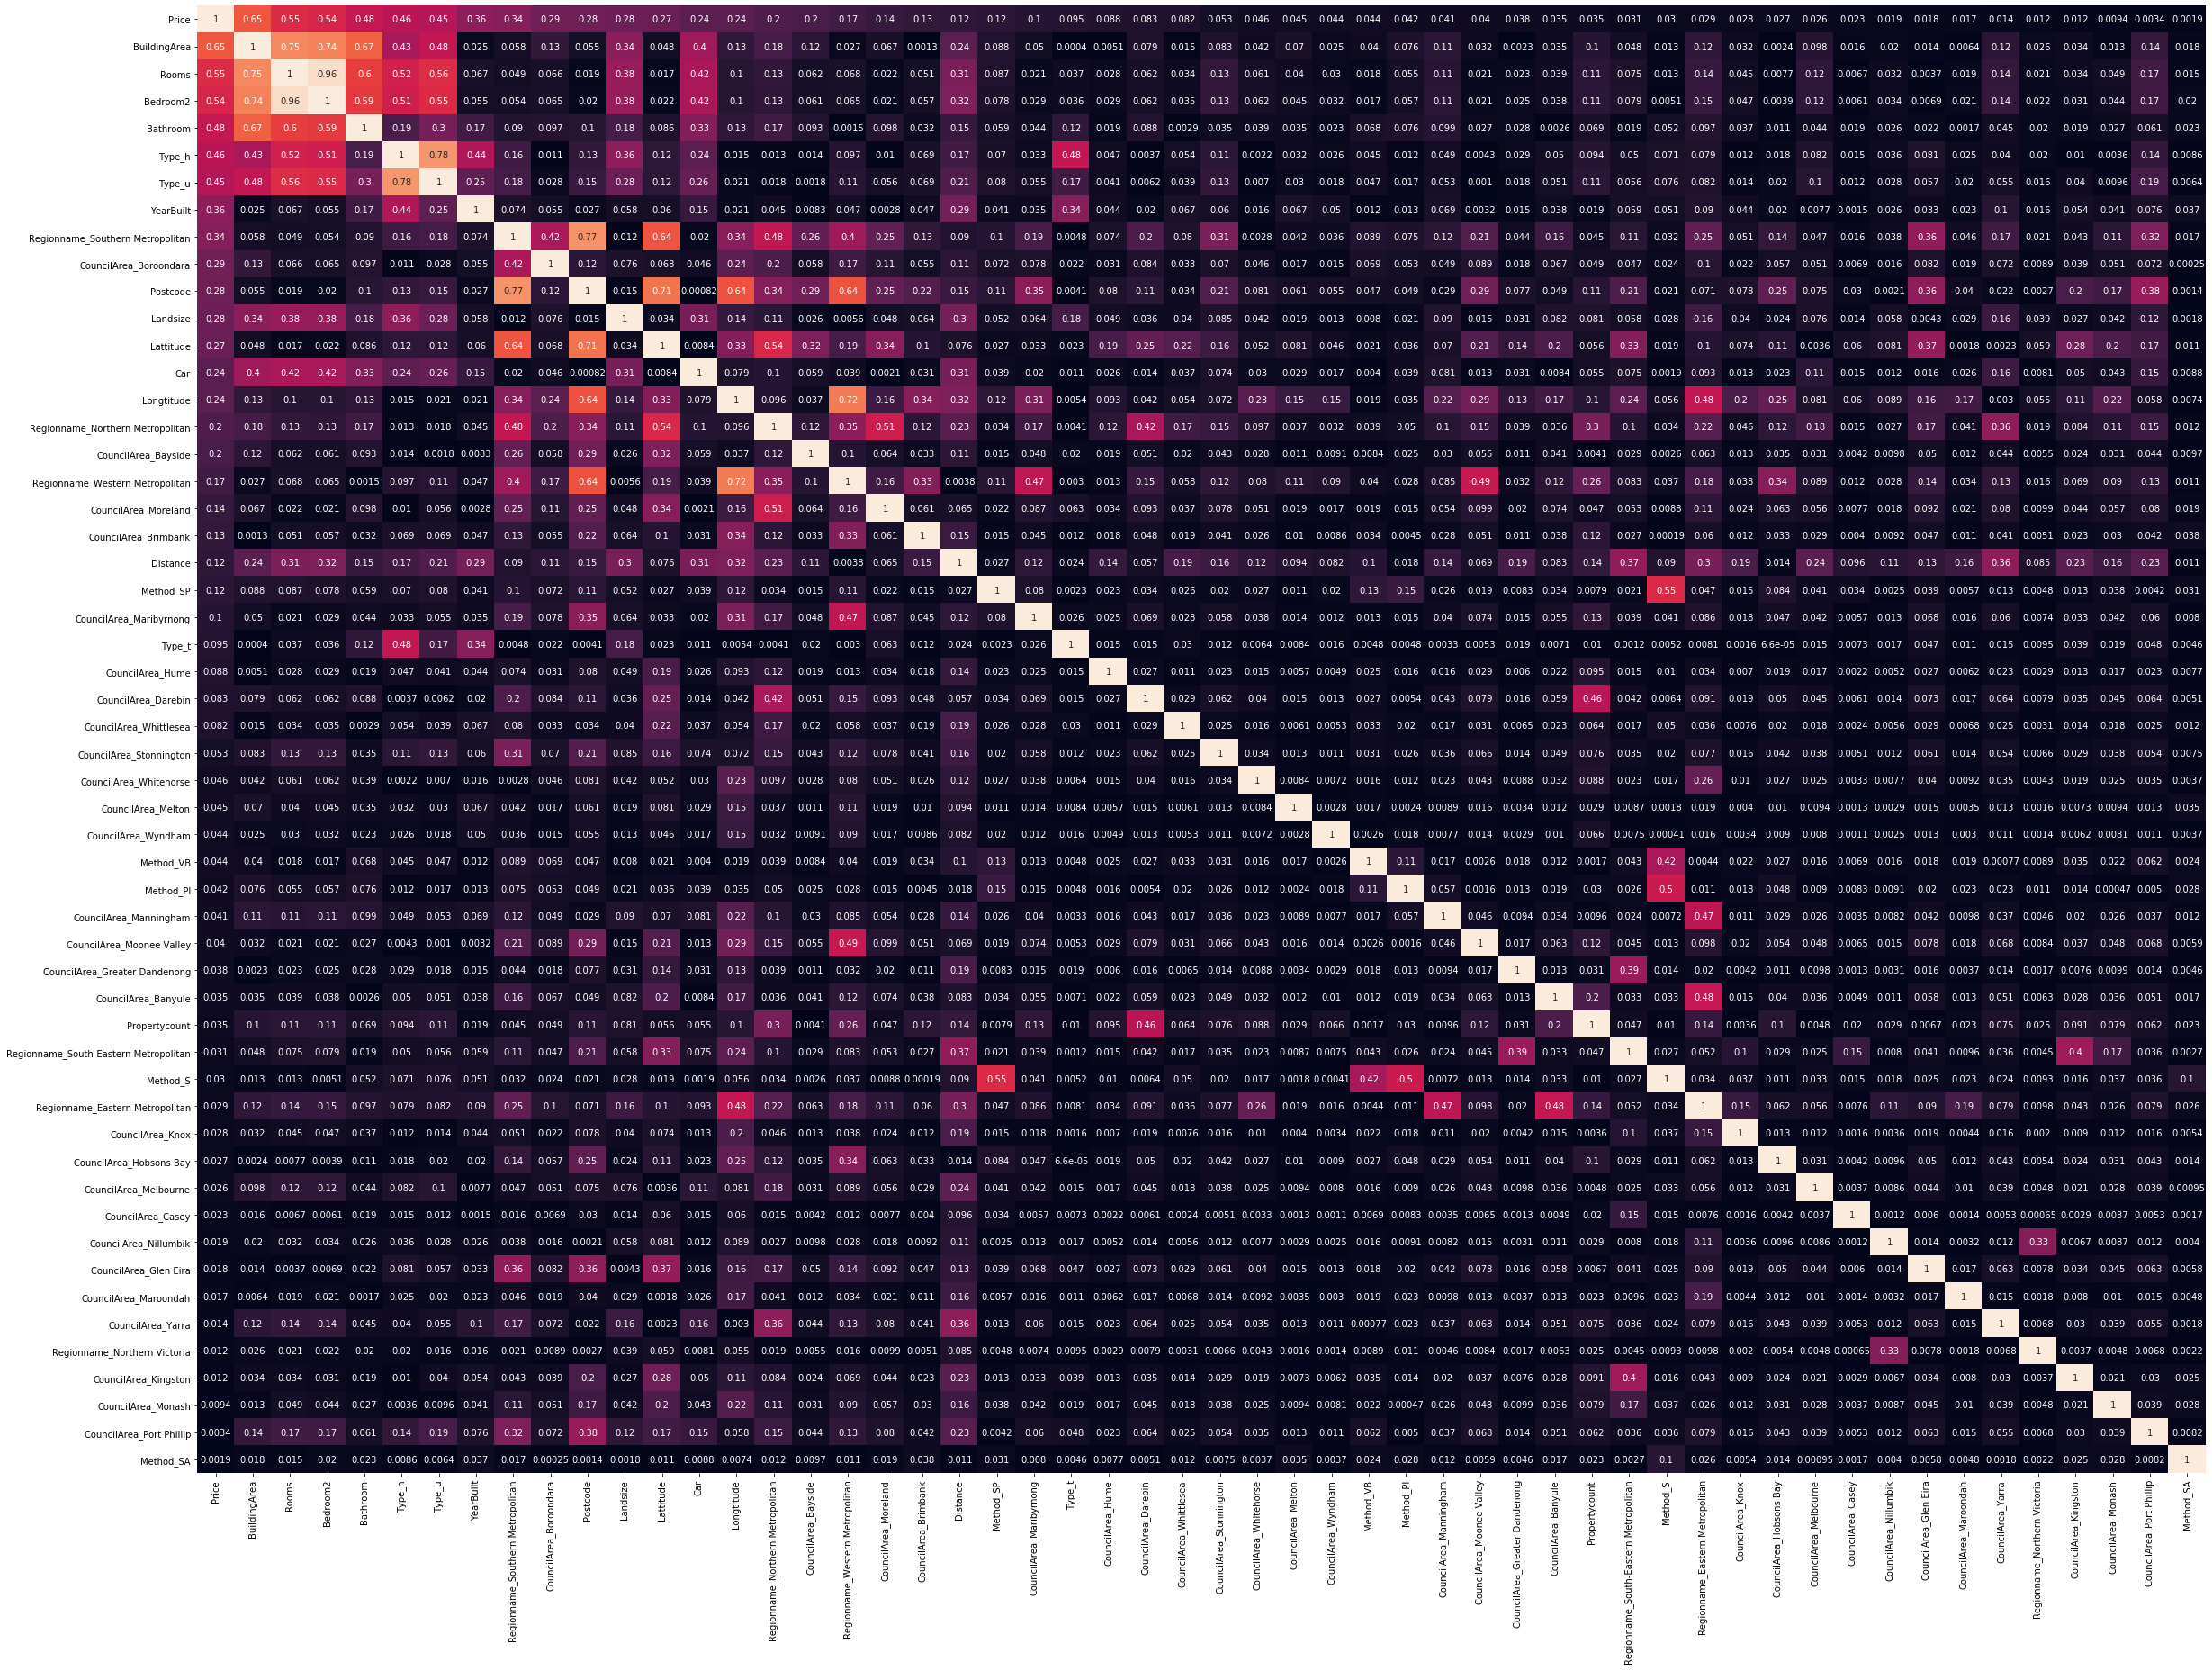

In [13]:
plt.figure(figsize=(40,30))
abs_corr_plot(dataset.join(full_dummy),'Price')

BA ~ Rooms + Bathroom + Type + Landsize + Car + Distance

In [ ]:
df_BA = dataset.dropna(subset=['BuildingArea'])
df_BAna = dataset[pd.isnull(dataset['BuildingArea'])]
print(len(df_BA),len(df_BAna))

In [ ]:
cols_ba = ['Rooms','Type','Distance','Bathroom','Landsize','Car']
Xba = df_BA[cols_ba]
yba = df_BA['BuildingArea']

Xbana = df_BAna[cols_ba]
ybana = df_BAna['BuildingArea']

In [ ]:
dummy_Xba = generate_dummies(Xba,'Type')
Xba = Xba.join(dummy_Xba)

dummy_Xbana = generate_dummies(Xbana,'Type')
Xbana = Xbana.join(dummy_Xbana)
Xbana.drop('Type',axis=1,inplace=True)

In [ ]:
Xba.drop('Type',axis=1,inplace=True)

In [ ]:
Xba.head()

In [ ]:
lm_regressor = LinearRegression()
svr_regressor = SVR(kernel='linear',C=10)
dt_regressor = DecisionTreeRegressor()
rf_regressor = RandomForestRegressor()
eval_metrics_ba,mdl_ba = fit_predict(Xba,yba,rf_regressor,10)

In [ ]:
resultsba = pd.DataFrame(data=np.array(eval_metrics_ba),columns=['i','mse','mae','mpe','r2'])
resultsba

In [ ]:
y_pred_baNa = mdl_ba.predict(Xbana)
Xbana['BuildingArea'] = y_pred_baNa

In [ ]:
dataset.loc[pd.isnull(dataset['BuildingArea']),'BuildingArea'] = Xbana['BuildingArea']

In [ ]:
full_dummy.columns

PRICE => 'Room','Bathroom','Type_h','Regionname_Southern Metropolitan','YearBuilt','Car','CouncilArea_Boroondara'

BA => 'Room', 'Type_u'

YB => 'Type

In [ ]:
sns.distplot(dataset['YearBuilt'],bins=50)

In [ ]:
print(dataset['Distance'].describe())
sns.distplot(dataset['Distance'],bins=20)

In [ ]:
dataset['Distance_cat'] = pd.cut(dataset['Distance'],10,labels=False)

In [ ]:
plt.figure(figsize=(15,6))
# sns.distplot(dataset['YearBuilt'],bins=100)
# sns.scatterplot(x='YearBuilt',y='Price',data=dataset,hue='Type')
# sns.boxenplot(x='Distance',y='YearBuilt',data=dataset)
# sns.boxenplot(x='Distance_cat',y='YearBuilt',data=dataset)
# sns.boxenplot(x='Type',y='YearBuilt',data=dataset)
# sns.boxenplot(x='Type',y='BuildingArea',data=dataset.drop(dataset[dataset['BuildingArea']>800].index))
# sns.scatterplot(x='Distance_cat',y='YearBuilt',data=dataset,hue='Type')


In [ ]:
na_index = dataset.index.isin(dataset[pd.isna(dataset['YearBuilt'])].index)
year_NA = dataset[na_index]
year_valid = dataset[~na_index]

In [ ]:
y1 = year_valid[['Distance_cat','Type','YearBuilt','BuildingArea']]

In [ ]:
y1.head()

In [ ]:
pv1 = pd.pivot_table(data=y1,index=['Type'],columns='Distance_cat',values='YearBuilt',aggfunc=np.median)
pv1 = pv1.fillna(pv1.mean())

In [ ]:
pv1

In [ ]:
typeDist_Year_json= json.loads(pv1.to_json())

In [ ]:
dataset['YearBuilt_1']=dataset['YearBuilt']
dataset.loc[dataset['YearBuilt'].isnull(),['YearBuilt_1']]=dataset.apply(lambda row: round(typeDist_Year_json[str(row['Distance_cat'])][row['Type']]),axis=1)
dataset[['YearBuilt','YearBuilt_1','Distance_cat','Type']]

 # FINAL

In [242]:
# d1 = dataset.loc[(dataset['Price']<3500000) & (dataset['Price']>250000)]
d1 = dataset
print(d1.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [243]:
d1.iloc[0]

Suburb                      Abbotsford
Address                25 Bloomburg St
Rooms                                2
Type                                 h
Price                        1.035e+06
Method                               S
SellerG                         Biggin
Date                         4/02/2016
Distance                           2.5
Postcode                          3067
Bedroom2                             2
Bathroom                             1
Car                                  0
Landsize                           156
BuildingArea                        79
YearBuilt                         1900
CouncilArea                      Yarra
Lattitude                     -37.8079
Longtitude                     144.993
Regionname       Northern Metropolitan
Propertycount                     4019
Name: 1, dtype: object

In [244]:
# Selecting non-object columns
dataset.select_dtypes(exclude=['object']).columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [245]:
dataset_cols = []
# dataset_cols =['Rooms','Bathroom','YearBuilt_1','Car']
dataset_cols = ['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude',
       'Propertycount']
dummy_gen_cols = ['Type','Regionname','CouncilArea']
dummy_cols = ['Type_h','Regionname_Southern Metropolitan','CouncilArea_Boroondara']
final_cols = dataset_cols+ dummy_gen_cols
print(final_cols)

['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'Type', 'Regionname', 'CouncilArea']


In [246]:
X = d1[final_cols]

In [247]:
y = d1['Price']
y

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12202     821000.0
12203     635000.0
12206    1050000.0
12207     385000.0
12209     560000.0
Name: Price, Length: 5468, dtype: float64

In [248]:
dummy_x = dummy_joiner(X,dummy_gen_cols)
# relevant_cols = dummy_x[dummy_cols]
relevant_cols = dummy_x
relevant_cols

,Type_t,Type_u,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,...,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12202,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12203,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12206,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12207,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
X= X.join(relevant_cols)
X = X.drop(dummy_gen_cols,axis=1)

In [27]:
X.iloc[0]

Rooms                                       2.0000
Distance                                    2.5000
Postcode                                 3067.0000
Bathroom                                    1.0000
Car                                         1.0000
Landsize                                  202.0000
Lattitude                                 -37.7996
Longtitude                                144.9984
Propertycount                            4019.0000
Type_t                                      0.0000
Type_u                                      0.0000
Regionname_Eastern Victoria                 0.0000
Regionname_Northern Metropolitan            1.0000
Regionname_Northern Victoria                0.0000
Regionname_South-Eastern Metropolitan       0.0000
Regionname_Southern Metropolitan            0.0000
Regionname_Western Metropolitan             0.0000
Regionname_Western Victoria                 0.0000
CouncilArea_Bayside                         0.0000
CouncilArea_Boroondara         

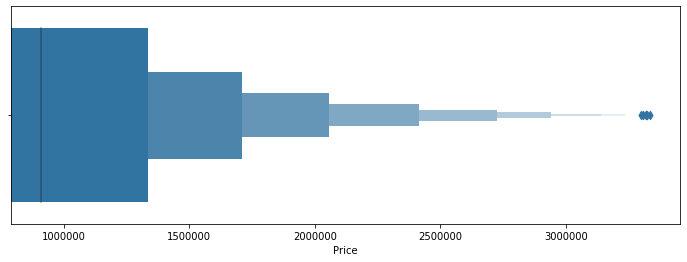

In [205]:
plt.figure(figsize=(12,4))
sns.boxenplot(y)

In [250]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

In [149]:
X = pd.DataFrame(sc_X.fit_transform(X),columns=X.columns)
# y = pd.DataFrame(sc_Y.fit_transform(pd.DataFrame(y)))

In [39]:
sc_Y.fit(y.values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
y_trans = sc_Y.transform(y.values.reshape(-1,1))

In [42]:
y_trans

array([[ 0.63244803],
       [-0.06363975],
       [ 0.6089844 ],
       ...,
       [ 0.14753294],
       [ 2.22797508],
       [ 0.3274208 ]])

In [52]:
sc_Y.inverse_transform(y_trans)

array([[1480000.],
       [1035000.],
       [1465000.],
       ...,
       [1170000.],
       [2500000.],
       [1285000.]])

In [53]:
y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

count    5.945000e+03
mean     1.060229e+06
std      5.559873e+05
min      3.000000e+05
25%      6.500000e+05
50%      9.100000e+05
75%      1.337000e+06
max      3.335000e+06
Name: Price, dtype: float64


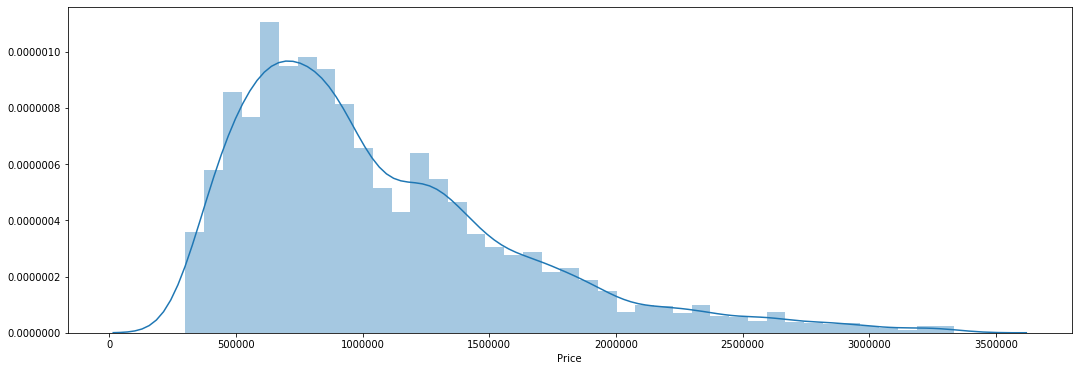

In [207]:
plt.figure(figsize=(18,6))
print(y.describe())
sns.distplot(y)

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import explained_variance_score

In [253]:
def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = check_arrays(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Fit Predict Model

In [116]:
def fit_predict(X,y,model,iterations=1):
    eval_metrics = []
    for i in range(0,iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
#         minmax = MinMaxScaler()
#         minmax.fit(X_train)
#         X_train = minmax.transform(X_train)
#         X_test = minmax.transform(X_test)
        sc_X = StandardScaler()
        sc_X.fit(X_train)
        X_train = sc_X.transform(X_train)
        X_test = sc_X.transform(X_test)
        mdl = model
        mdl.fit(X_train,y_train.values.ravel())
        y_pred = pd.DataFrame(mdl.predict(X_test))
        print(f'Finished Run: {i}')
        rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
        mae = metrics.mean_absolute_error(y_test,y_pred)
        mpe = mean_absolute_percentage_error(y_test.values,y_pred.values)
        r2 = metrics.r2_score(y_test,y_pred)
        evs = explained_variance_score(y_test,y_pred)
        eval_metrics.append([rmse,mae,mpe,r2,evs])
    return eval_metrics,mdl

In [115]:
models = {
#     "lin_reg": LinearRegression(),
#     "svr_1": SVR(kernel='linear'),
#     "svr_2": SVR(kernel='poly'),
#     "dt_reg": DecisionTreeRegressor(),
    "rf_reg": RandomForestRegressor()
}

In [76]:
full_results = pd.DataFrame(columns=['model','rmse','mae','mpe','r2','evs'])
for modl in models:
    eval_metrics,mdl = fit_predict(X,y,models[modl],10)
    result = pd.DataFrame(data=np.array(eval_metrics),columns=['rmse','mae','mpe','r2','evs'])
    print(result.mean())
    result = pd.DataFrame(result.mean()).transpose()
    result['model'] = modl
    result = result[['model','rmse','mae','mpe','r2','evs']]
    full_results=pd.concat([full_results,result])


Finished Run: 0
Finished Run: 1
Finished Run: 2
Finished Run: 3
Finished Run: 4
Finished Run: 5
Finished Run: 6
Finished Run: 7
Finished Run: 8
Finished Run: 9
rmse    238749.924554
mae     162108.264050
mpe         64.672361
r2           0.813261
evs          0.813442
dtype: float64


In [ ]:
# X_train
# pd.DataFrame({'Feature':list(X_train.columns),'Coef':list(lm.coef_)})

In [77]:
# results = pd.DataFrame(data=np.array(em),columns=['i','rmse','mae','mpe','r2','evs'])
# results
full_results

,model,rmse,mae,mpe,r2,evs
0,rf_reg,238749.924554,162108.26405,64.672361,0.813261,0.813442


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
mdl.fit(X_train,y_train)
y_pred = pd.DataFrame(mdl.predict(X_test))
plt.figure(figsize=(15,6))
sns.boxplot(y_pred - y_test)

ValueError: x and y must be the same size

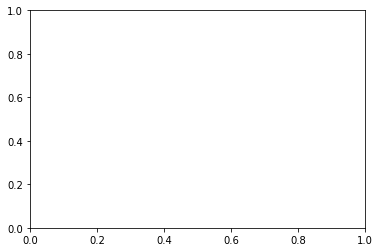

In [213]:
residual_quantiles = (y_pred-y_test).quantile(np.array(list(range(0,101,2)))*0.01)
plt.scatter(x=residual_quantiles.index,y=residual_quantiles.values)

## Tensorflow

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape

ValueError: Found input variables with inconsistent numbers of samples: [5468, 5]

In [295]:
minmax2 = MinMaxScaler()
minmax2.fit(X_train)
X_train = minmax2.transform(X_train)
X_test = minmax2.transform(X_test)

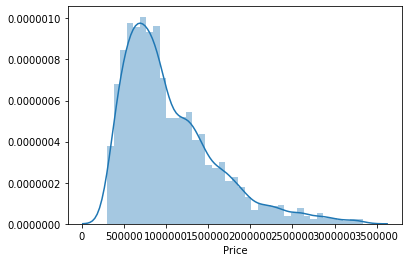

In [256]:
sns.distplot(y)

In [102]:
minmx = MinMaxScaler()
minmx.fit(y.values.reshape(-1,1))
y_mn = minmx.transform(y.values.reshape(-1,1))

In [112]:
scy = StandardScaler()
scy.fit(y.values.reshape(-1,1))
y_sc = scy.transform(y.values.reshape(-1,1))

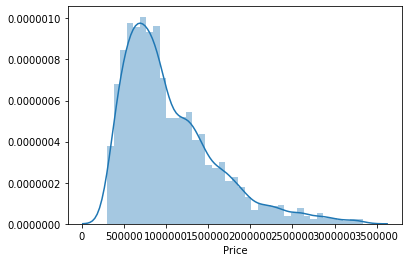

In [113]:
sns.distplot(y)

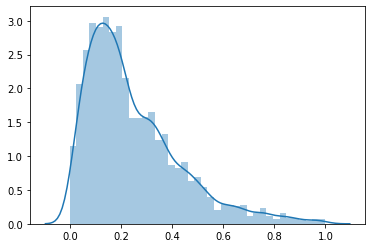

In [108]:
sns.distplot(y_mn)

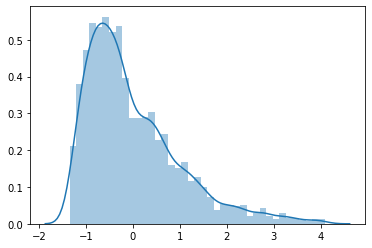

In [114]:
sns.distplot(y_sc)

In [237]:
from tensorflow.keras import Sequential

In [238]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [296]:
tf_model = Sequential()
tf_model.add(Dense(45,activation='relu'))
# tf_model.add(Dropout(rate=0.2))
tf_model.add(Dense(22,activation='relu'))
# tf_model.add(Dropout(rate=0.2))
tf_model.add(Dense(11,activation='relu'))
# tf_model.add(Dropout(rate=0.2))
tf_model.add(Dense(5,activation='relu'))
# tf_model.add(Dropout(rate=0.2))
tf_model.add(Dense(1))

tf_model.compile(optimizer='adam',loss='mse')

In [297]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=30)

In [298]:
tf_model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),
            epochs=500,batch_size=256,callbacks=[early_stop])

Train on 3827 samples, validate on 1641 samples
Epoch 1/500
3827/3827 [==============================] - 1s 365us/sample - loss: 1406806703301.7361 - val_loss: 1430416493071.9124
Epoch 2/500
3827/3827 [==============================] - 0s 37us/sample - loss: 1406806635830.6516 - val_loss: 1430416431729.2578
Epoch 3/500
3827/3827 [==============================] - 0s 36us/sample - loss: 1406806494894.8586 - val_loss: 1430416251375.4636
Epoch 4/500
3827/3827 [==============================] - 0s 39us/sample - loss: 1406806140243.5496 - val_loss: 1430415686192.3608
Epoch 5/500
3827/3827 [==============================] - 0s 35us/sample - loss: 1406805271031.0364 - val_loss: 1430414305743.0151
Epoch 6/500
3827/3827 [==============================] - 0s 35us/sample - loss: 1406803022017.7227 - val_loss: 1430410692357.1482
Epoch 7/500
3827/3827 [==============================] - 0s 33us/sample - loss: 1406797672759.4543 - val_loss: 1430402573241.4868
Epoch 8/500
3827/3827 [==================

3827/3827 [==============================] - 0s 36us/sample - loss: 282597843755.2798 - val_loss: 286395899539.5783
Epoch 64/500
3827/3827 [==============================] - 0s 37us/sample - loss: 279014586485.1967 - val_loss: 282737221187.7051
Epoch 65/500
3827/3827 [==============================] - 0s 37us/sample - loss: 276005261411.5370 - val_loss: 279621157612.8117
Epoch 66/500
3827/3827 [==============================] - 0s 68us/sample - loss: 273436707131.2004 - val_loss: 276865546510.8203
Epoch 67/500
3827/3827 [==============================] - 0s 40us/sample - loss: 271076665849.7120 - val_loss: 274453820812.2462
Epoch 68/500
3827/3827 [==============================] - 0s 45us/sample - loss: 268995693634.0904 - val_loss: 272190024841.9062
Epoch 69/500
3827/3827 [==============================] - 0s 41us/sample - loss: 267052025216.5017 - val_loss: 270051633125.7916
Epoch 70/500
3827/3827 [==============================] - 0s 38us/sample - loss: 265201350327.9561 - val_loss:

3827/3827 [==============================] - 0s 37us/sample - loss: 198603349624.2738 - val_loss: 194898483735.4004
Epoch 127/500
3827/3827 [==============================] - 0s 36us/sample - loss: 197681624117.7821 - val_loss: 193874963484.0804
Epoch 128/500
3827/3827 [==============================] - 0s 36us/sample - loss: 196786796789.6316 - val_loss: 192911810844.5484
Epoch 129/500
3827/3827 [==============================] - 0s 38us/sample - loss: 195857282328.6836 - val_loss: 191859667495.6246
Epoch 130/500
3827/3827 [==============================] - 0s 38us/sample - loss: 194940571983.0008 - val_loss: 190856062460.5679
Epoch 131/500
3827/3827 [==============================] - 0s 37us/sample - loss: 194034892183.5129 - val_loss: 189847200108.4217
Epoch 132/500
3827/3827 [==============================] - 0s 43us/sample - loss: 193143860664.6919 - val_loss: 188837710112.2925
Epoch 133/500
3827/3827 [==============================] - 0s 41us/sample - loss: 192237614750.2691 - va

Epoch 189/500
3827/3827 [==============================] - 0s 37us/sample - loss: 147983179452.7724 - val_loss: 140040268758.1913
Epoch 190/500
3827/3827 [==============================] - 0s 36us/sample - loss: 147293725329.1581 - val_loss: 139309093180.9969
Epoch 191/500
3827/3827 [==============================] - 0s 38us/sample - loss: 146616368860.8811 - val_loss: 138606924003.1396
Epoch 192/500
3827/3827 [==============================] - 0s 38us/sample - loss: 145947241649.4006 - val_loss: 137882273191.7026
Epoch 193/500
3827/3827 [==============================] - 0s 39us/sample - loss: 145288525153.4633 - val_loss: 137162907413.3723
Epoch 194/500
3827/3827 [==============================] - 0s 39us/sample - loss: 144618809087.6655 - val_loss: 136473284765.2504
Epoch 195/500
3827/3827 [==============================] - 0s 37us/sample - loss: 143962272068.2979 - val_loss: 135783102585.0579
Epoch 196/500
3827/3827 [==============================] - 0s 38us/sample - loss: 14330309

Epoch 252/500
3827/3827 [==============================] - 0s 41us/sample - loss: 116982017698.0152 - val_loss: 108055541436.7630
Epoch 253/500
3827/3827 [==============================] - 0s 41us/sample - loss: 116731062396.6888 - val_loss: 107799096542.7715
Epoch 254/500
3827/3827 [==============================] - 0s 43us/sample - loss: 116428210004.7536 - val_loss: 107526558956.4997
Epoch 255/500
3827/3827 [==============================] - 0s 41us/sample - loss: 116161981867.8484 - val_loss: 107268052359.2541
Epoch 256/500
3827/3827 [==============================] - 0s 39us/sample - loss: 115921079860.8456 - val_loss: 106991007949.9232
Epoch 257/500
3827/3827 [==============================] - 0s 40us/sample - loss: 115645969496.0314 - val_loss: 106761817914.8129
Epoch 258/500
3827/3827 [==============================] - 0s 44us/sample - loss: 115391969791.0635 - val_loss: 106529437048.2779
Epoch 259/500
3827/3827 [==============================] - 0s 49us/sample - loss: 11513851

3827/3827 [==============================] - 0s 39us/sample - loss: 105795092537.7957 - val_loss: 98037795019.4272
Epoch 316/500
3827/3827 [==============================] - 0s 41us/sample - loss: 105762545225.1811 - val_loss: 97923062160.6143
Epoch 317/500
3827/3827 [==============================] - 0s 38us/sample - loss: 105575153766.7478 - val_loss: 97837252043.8952
Epoch 318/500
3827/3827 [==============================] - 0s 42us/sample - loss: 105430968757.2135 - val_loss: 97749308173.2602
Epoch 319/500
3827/3827 [==============================] - 0s 42us/sample - loss: 105341378482.9391 - val_loss: 97653562743.0299
Epoch 320/500
3827/3827 [==============================] - 0s 40us/sample - loss: 105215182514.6047 - val_loss: 97571643886.2157
Epoch 321/500
3827/3827 [==============================] - 0s 35us/sample - loss: 105101339174.6642 - val_loss: 97479658878.5180
Epoch 322/500
3827/3827 [==============================] - 0s 37us/sample - loss: 104980256046.0894 - val_loss:

3827/3827 [==============================] - 0s 45us/sample - loss: 99818603127.4711 - val_loss: 93448468780.7727
Epoch 379/500
3827/3827 [==============================] - 0s 40us/sample - loss: 99704388863.5317 - val_loss: 93369108828.1974
Epoch 380/500
3827/3827 [==============================] - 0s 44us/sample - loss: 99624322293.3640 - val_loss: 93305763471.8342
Epoch 381/500
3827/3827 [==============================] - 0s 43us/sample - loss: 99556426053.3682 - val_loss: 93238361887.3565
Epoch 382/500
3827/3827 [==============================] - 0s 49us/sample - loss: 99532757911.9143 - val_loss: 93197066679.3029
Epoch 383/500
3827/3827 [==============================] - 0s 45us/sample - loss: 99364788643.0186 - val_loss: 93094096359.3516
Epoch 384/500
3827/3827 [==============================] - 0s 44us/sample - loss: 99317914010.4562 - val_loss: 93029439544.1609
Epoch 385/500
3827/3827 [==============================] - 0s 40us/sample - loss: 99235234808.7755 - val_loss: 9295568

Epoch 442/500
3827/3827 [==============================] - 0s 38us/sample - loss: 94645802834.0779 - val_loss: 88996383123.1103
Epoch 443/500
3827/3827 [==============================] - 0s 40us/sample - loss: 94556949923.2861 - val_loss: 88914383579.3394
Epoch 444/500
3827/3827 [==============================] - 0s 42us/sample - loss: 94522959834.0047 - val_loss: 88875246366.7325
Epoch 445/500
3827/3827 [==============================] - 0s 43us/sample - loss: 94395821492.4108 - val_loss: 88769611285.5283
Epoch 446/500
3827/3827 [==============================] - 0s 42us/sample - loss: 94311890518.0246 - val_loss: 88712818221.2407
Epoch 447/500
3827/3827 [==============================] - 0s 40us/sample - loss: 94259877921.7141 - val_loss: 88647477101.9817
Epoch 448/500
3827/3827 [==============================] - 0s 39us/sample - loss: 94171243369.3567 - val_loss: 88555166101.6063
Epoch 449/500
3827/3827 [==============================] - 0s 41us/sample - loss: 94081570646.3590 - val

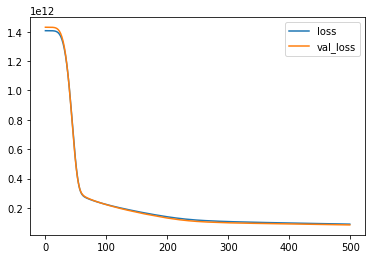

In [299]:
losses = pd.DataFrame(tf_model.history.history)
losses.plot()

In [300]:
y_pred_tf = tf_model.predict(X_test)

In [301]:
metrics.explained_variance_score(y_test.values,y_pred_tf.ravel())

0.7326028228582679

In [302]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred_tf.ravel()))

291555.63221206097

In [223]:
# y_test2 = sc_Y.inverse_transform(y_test)
# y_pred_tf2 = sc_Y.inverse_transform(y_pred_tf)

In [303]:
mean_absolute_percentage_error(y_test.values,y_pred_tf.ravel())

22.240580570027525

In [304]:
x=pd.DataFrame(np.array([[1,2],[2,3],[3,5],[4,7],[5,9]]))
x

,0,1
0,1,2
1,2,3
2,3,5
3,4,7
4,5,9


In [305]:
y=pd.DataFrame(np.array([2,3,4,5,6]))
y

,0
0,2
1,3
2,4
3,5
4,6


In [306]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y)

In [217]:
x_tr

,0,1
3,4,7
4,5,9
1,2,3


In [218]:
y_tr

,0
3,5
4,6
1,3


In [235]:
x_tr.values

array([[4, 7],
       [5, 9],
       [2, 3]])

In [221]:
np.array([[2,3],[3,4],[4,5]]).reshape(-1,1)

array([[2],
       [3],
       [3],
       [4],
       [4],
       [5]])